# Research Question 1

## When did WFH start?

+ Work from home....

In [2]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from pdb import set_trace
from datetime import datetime
from collections import defaultdict
from pathlib import Path
# Current Working directory
cur_dir = Path.cwd()

# --- Process Google's global mobility data ---
google_mobility_data = pd.read_csv('google_mobility_data.csv')
google_mobility_data_by_date = google_mobility_data.groupby(["date"])

wfh_data = pd.DataFrame(columns=['Date', 'Mean Workplace', 'Std Workplace', 'Mean Residential', 'Std Residential'])
idx = 0
for key, item in google_mobility_data_by_date:
    country = item.describe()
    wfh_data = wfh_data.append({
        'Date': key, 
        'Median Workplace': country.workplaces_percent_change_from_baseline["50%"],
        '25th Workplace': country.workplaces_percent_change_from_baseline["25%"],
        '75th Workplace': country.workplaces_percent_change_from_baseline["75%"],
        'Median Residential': country.residential_percent_change_from_baseline["50%"],
        '25th Residential': country.residential_percent_change_from_baseline["25%"],
        '75th Residential': country.residential_percent_change_from_baseline["75%"]
    }, ignore_index=True)    

wfh_data['Date'] = pd.to_datetime(wfh_data['Date'], format="%Y-%m-%d")
start_date = wfh_data['Date'].iloc[0]
end_date = wfh_data['Date'].iloc[-1]

# --- Process Repository data ---
# ----- All Creations ----
all_data = pd.read_csv(cur_dir.joinpath('measures/repositories/all.csv'), header=None)
all_data.columns = ["Date", "number_new_repositories"]
all_data["Year"] = all_data["Date"].apply(lambda x: x.split("-")[0]).astype(int)
all_data["Date"] = pd.to_datetime(all_data["Date"], format="%Y-%m-%d")
all_data.sort_values(by=["Year", "Date"], inplace=True)
all_2020 = all_data.loc[(start_date <= all_data["Date"]) & (all_data["Date"] <= end_date)]
# -- Min-Max norm --
all_max = all_2020["number_new_repositories"].max()
all_min = all_2020["number_new_repositories"].min()
all_range = all_max - all_min
all_2020["percent_change_from_baseline"] = all_2020["number_new_repositories"].apply(lambda x: (x-all_min)*100/all_range).astype(int)

# ----- COVID-19 Related -----
covid = pd.read_csv(cur_dir.joinpath('measures/repositories/covid_related.csv'), header=None)
covid.columns = ["Date", "number_new_repositories"]
covid["Year"] = covid["Date"].apply(lambda x: x.split("-")[0]).astype(int)
covid["Date"] = covid["Date"].astype('datetime64[ns]')
covid.sort_values(by=["Year", "Date"], inplace=True)
covid_2020 = covid.loc[(start_date <= covid["Date"]) & (covid["Date"] <= end_date)]
# -- Min-Max norm --
covid_max = covid_2020["number_new_repositories"].max()
covid_min = covid_2020["number_new_repositories"].min()
covid_range = covid_max - covid_min
covid_2020["percent_change_from_baseline"] = covid_2020["number_new_repositories"].apply(lambda x: (x-covid_min)*100/covid_range).astype(int)


/Users/rkrsn/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rkrsn/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


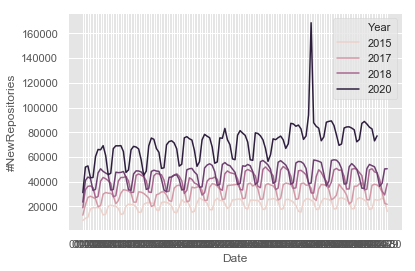

In [7]:
all = pd.read_csv(cur_dir.joinpath('measures/repositories/all.csv'), header=None)
all.columns = ["Date", "#NewRepositories"]
all["Year"] = all["Date"].apply(lambda x: x.split("-")[0]).astype(int)
all["Date"] = all["Date"].apply(lambda x: "-".join(x.split("-")[1:]))
all.sort_values(by=["Year", "Date"], inplace=True)
# set_trace()
ax = sns.lineplot(x="Date", y="#NewRepositories", hue="Year", data=all)

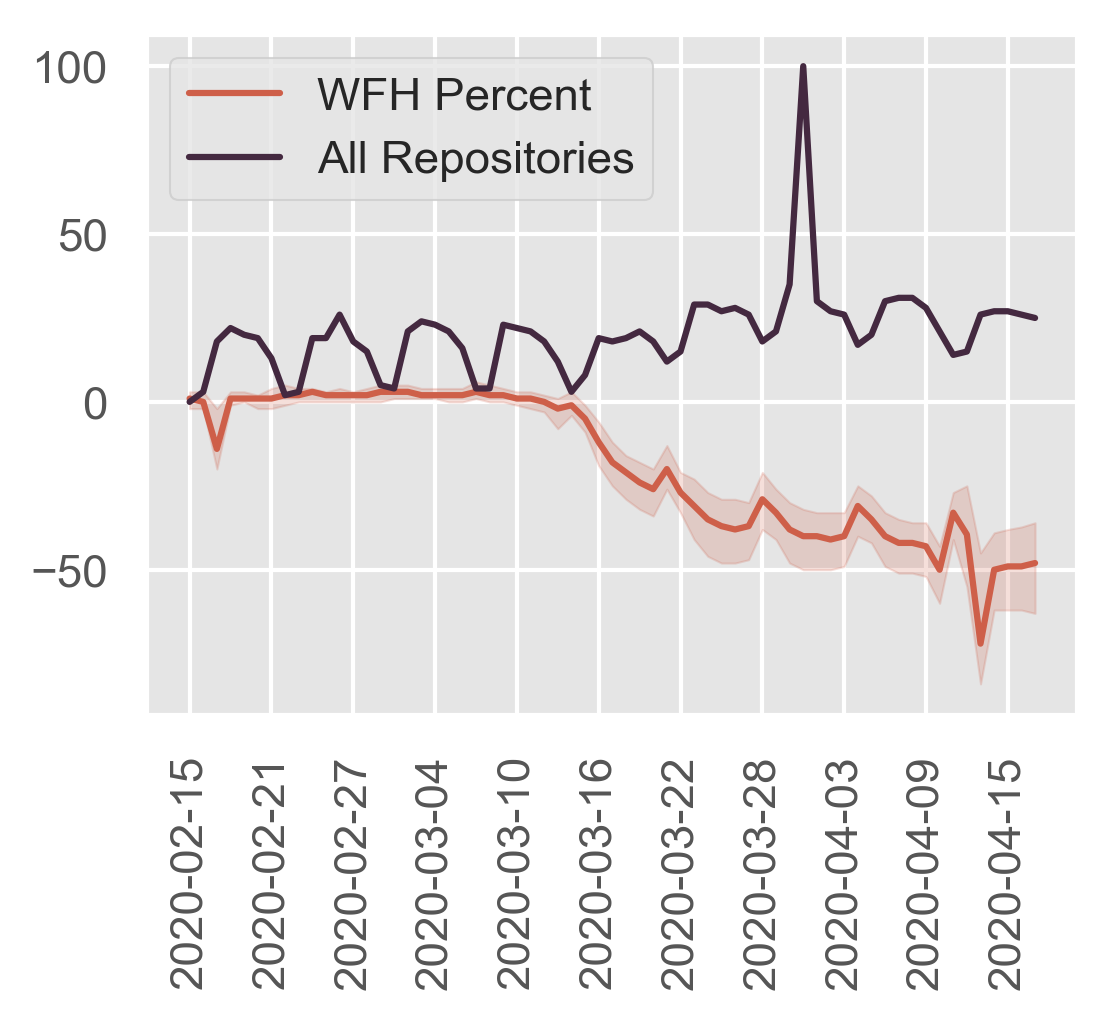

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
w = 4
h = 3
d = 300
fig, ax = plt.subplots(1, 1, figsize=(w, h), dpi=d)
x = wfh_data["Date"].astype(str)

wrk = wfh_data["Median Workplace"]
wrk_std_upper = wfh_data["75th Workplace"]
wrk_std_lower = wfh_data["25th Workplace"]

home = wfh_data["Median Residential"]
home_std_upper = wfh_data["75th Residential"]
home_std_lower = wfh_data["25th Residential"]

new_repos = all_2020["percent_change_from_baseline"]
new_covid_related_repos = covid_2020["percent_change_from_baseline"]

plt.plot(x, wrk, color='#CE5F49', label="WFH Percent")
plt.fill_between(x, wrk_std_lower, wrk_std_upper, color='#CE5F49', alpha=0.2)

# plt.plot(x, home, color='#1C0B0E')
# plt.fill_between(x, home_std_lower, home_std_upper, color='#1C0B0E', alpha=0.2)

plt.plot(x, new_repos, color='#442940', label='All Repositories')
# plt.plot(x, new_covid_related_repos, color='#132A49', label="COVID Related Repos")

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc='upper left')
plt.show()


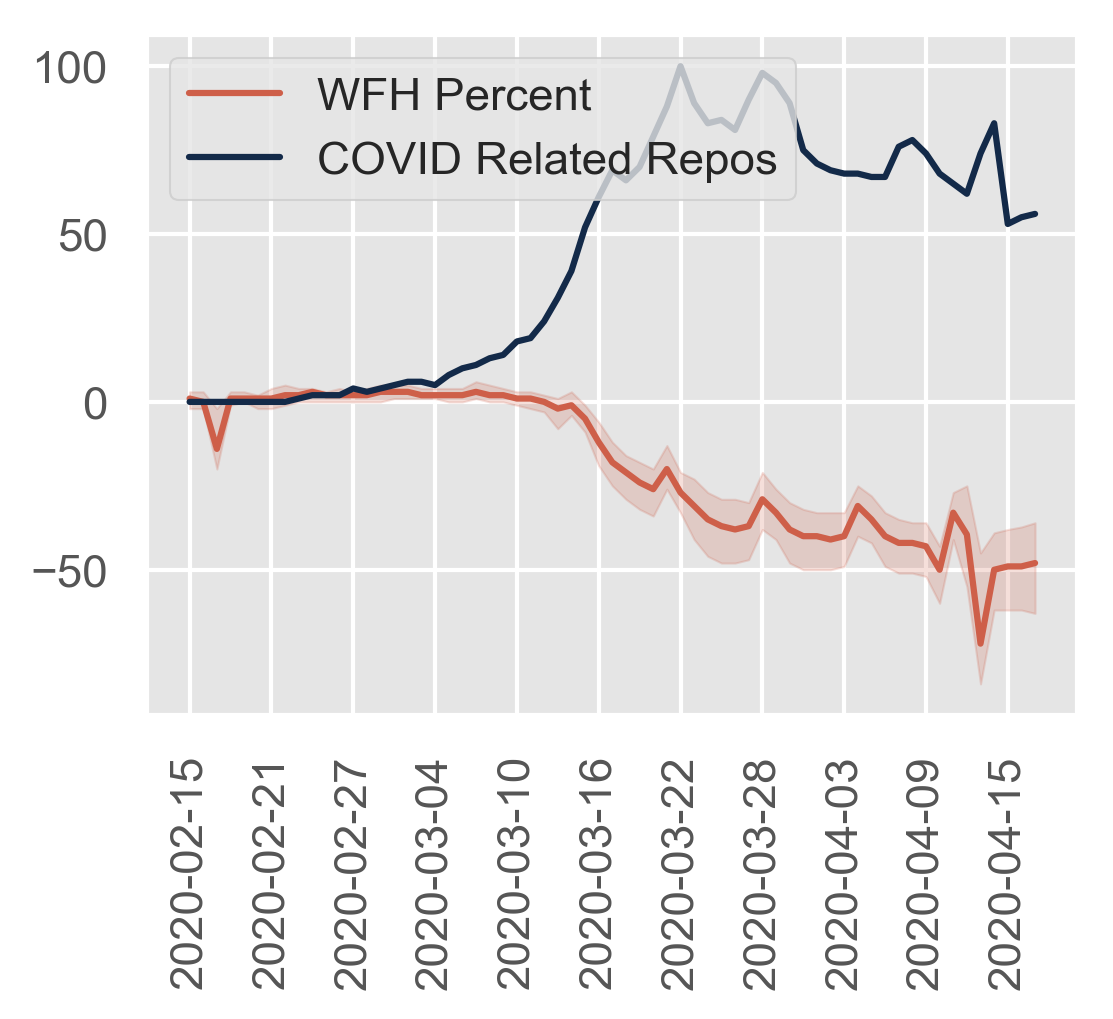

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
w = 4
h = 3
d = 300
fig, ax = plt.subplots(1, 1, figsize=(w, h), dpi=d)
x = wfh_data["Date"].astype(str)

wrk = wfh_data["Median Workplace"]
wrk_std_upper = wfh_data["75th Workplace"]
wrk_std_lower = wfh_data["25th Workplace"]

home = wfh_data["Median Residential"]
home_std_upper = wfh_data["75th Residential"]
home_std_lower = wfh_data["25th Residential"]

new_repos = all_2020["percent_change_from_baseline"]
new_covid_related_repos = covid_2020["percent_change_from_baseline"]


plt.plot(x, wrk, color='#CE5F49', label="WFH Percent")
plt.fill_between(x, wrk_std_lower, wrk_std_upper, color='#CE5F49', alpha=0.2)

# plt.plot(x, home, color='#1C0B0E')
# plt.fill_between(x, home_std_lower, home_std_upper, color='#1C0B0E', alpha=0.2)

# plt.plot(x, new_repos, color='#442940', label='All Repositories')
plt.plot(x, new_covid_related_repos, color='#132A49', label="COVID Related Repos")

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc='upper left')
plt.show()


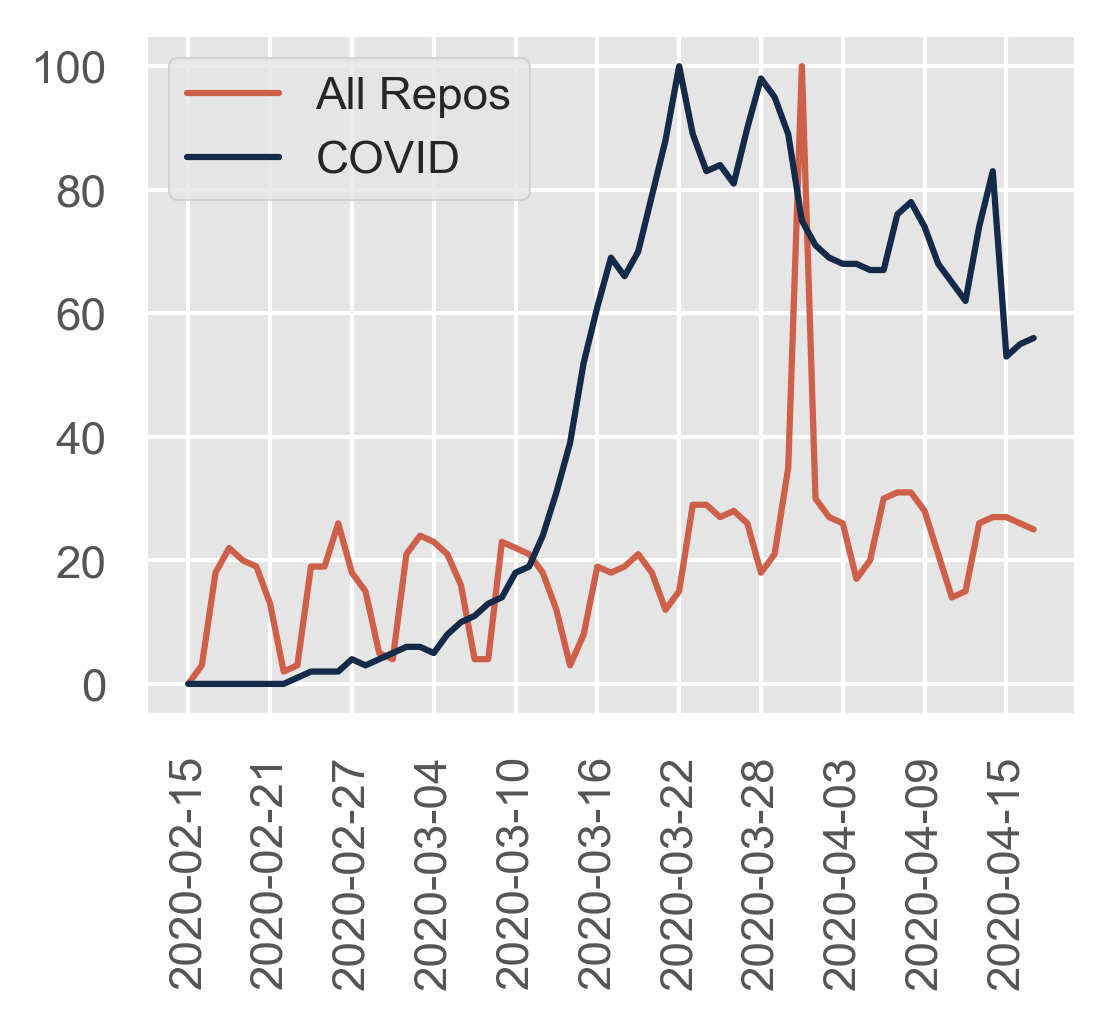

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
w = 4
h = 3
d = 300
fig, ax = plt.subplots(1, 1, figsize=(w, h), dpi=d)
x = wfh_data["Date"].astype(str)

wrk = wfh_data["Median Workplace"]
wrk_std_upper = wfh_data["75th Workplace"]
wrk_std_lower = wfh_data["25th Workplace"]

home = wfh_data["Median Residential"]
home_std_upper = wfh_data["75th Residential"]
home_std_lower = wfh_data["25th Residential"]

new_repos = all_2020["percent_change_from_baseline"]
new_covid_related_repos = covid_2020["percent_change_from_baseline"]


# plt.plot(x, wrk, color='#CE5F49')
# plt.fill_between(x, wrk_std_lower, wrk_std_upper, color='#CE5F49', alpha=0.2)

# plt.plot(x, home, color='#1C0B0E')
# plt.fill_between(x, home_std_lower, home_std_upper, color='#1C0B0E', alpha=0.2)

plt.plot(x, new_repos, color='#CE5F49', label='All Repos')
plt.plot(x, new_covid_related_repos, color='#132A49', label='COVID')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_tick_params(rotation=90)
ax.legend()
plt.show()

